In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\AliOs\Downloads\AirlineTweets.csv")

In [2]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer 

tokenizer=Tokenizer(num_words=2000)


In [4]:
newsentement=[]
for one in df['airline_sentiment']:
    if one =='neutral':
        x=1
    elif one=='negative':
        x=0
    else:
        x=2
    newsentement.append(x)

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

newsentement=to_categorical(newsentement,num_classes=3)

X_train,X_test,y_train,y_test=train_test_split(df['text'],newsentement,test_size=0.3,random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE


In [7]:
from tensorflow.keras.utils import pad_sequences 
tokenizer.fit_on_texts(X_train)
X_train_fit=tokenizer.texts_to_sequences(X_train)
X_test_fit=tokenizer.texts_to_sequences(X_test)
X_train_fit_padded=pad_sequences(X_train_fit)


In [8]:
X_train_fit_padded.shape

(10248, 32)

In [9]:
len(tokenizer.word_index)

12918

In [10]:
X_test_fit_padded=pad_sequences(X_test_fit,maxlen=32)

In [11]:
X_train_fit_padded.shape[1]

32

In [12]:
 from tensorflow.keras import Input,Model

input=Input(shape=(X_train_fit_padded.shape[1],))


In [13]:
from tensorflow.keras.layers import Dense,Conv1D,MaxPool1D,GlobalMaxPool1D,Embedding,Dropout

neuron=Embedding(2000,30)(input)

neuron=Conv1D(128,2 ,activation='relu')(neuron)
neuron=GlobalMaxPool1D()(neuron)
neuron=Dropout(0.7)(neuron)

neuron=Dense(10,activation='relu')(neuron)

neuron=Dense(3,activation='softmax')(neuron)







In [14]:
model=Model(input,neuron)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 32, 30)         │        60,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 31, 128)        │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,131 (270.04 KB)

 Trainable params: 69,131 (270.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(
    loss=CategoricalCrossentropy(),
    metrics=['AUC', 'accuracy','f1_score'],
    optimizer=Adam(learning_rate=0.001)
)


In [17]:
import numpy as np
r=model.fit(
    X_train_fit_padded, np.array(y_train),
    validation_data=(X_test_fit_padded, np.array(y_test)),
    epochs=8
    
)

Epoch 1/8
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7752 - accuracy: 0.6308 - f1_score: 0.2874 - loss: 0.8908 - val_AUC: 0.9032 - val_accuracy: 0.7648 - val_f1_score: 0.6442 - val_loss: 0.6124
Epoch 2/8
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8980 - accuracy: 0.7610 - f1_score: 0.6718 - loss: 0.6236 - val_AUC: 0.9211 - val_accuracy: 0.7923 - val_f1_score: 0.7090 - val_loss: 0.5460
Epoch 3/8
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.9285 - accuracy: 0.8002 - f1_score: 0.7247 - loss: 0.5204 - val_AUC: 0.9257 - val_accuracy: 0.7976 - val_f1_score: 0.7277 - val_loss: 0.5288
Epoch 4/8
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.9411 - accuracy: 0.8162 - f1_score: 0.7538 - loss: 0.4710 - val_AUC: 0.9260 - val_accuracy: 0.8028 - val_f1_score: 0.7251 - val_loss: 0.5304
Epoch 5/8
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9470 - accuracy: 0.8340 - f1_score: 0.7797 - loss: 0.4458 - val_AUC: 0.9268 - val_accuracy: 0.8028 - val_f1_score: 0.7313 - val_loss: 0.

In [18]:
from sklearn.metrics import f1_score
import numpy as np

y_prob = model.predict(X_test_fit_padded)

results = []

thresholds = [0.3,0.4, 0.5, 0.6,0.7]

for threshold in thresholds:
    y_pred = np.zeros_like(y_prob)
    
    y_pred[y_prob >= threshold] = 1
    
    y_pred = to_categorical(np.argmax(y_pred, axis=1),num_classes=3)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'Threshold: {threshold}, F1 Score: {f1}')
    
    results.append((threshold, f1))

best_threshold, best_f1 = max(results, key=lambda x: x[1])
print(f'Best Threshold: {best_threshold}, Best F1 Score: {best_f1}')


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold: 0.3, F1 Score: 0.7968046782533017
Threshold: 0.4, F1 Score: 0.7969975054422139
Threshold: 0.5, F1 Score: 0.7927533662085305
Threshold: 0.6, F1 Score: 0.7868629285425783
Threshold: 0.7, F1 Score: 0.7617714818348995
Best Threshold: 0.4, Best F1 Score: 0.7969975054422139


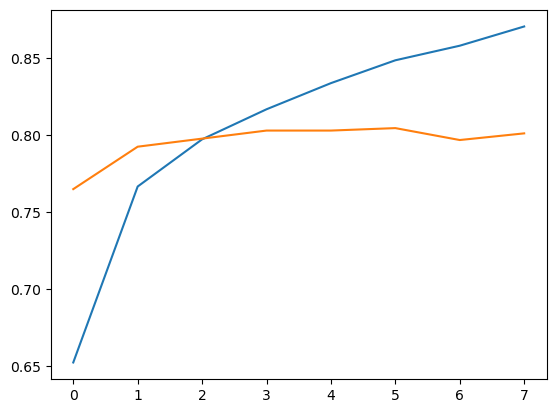

In [19]:
import matplotlib.pyplot as plt 
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

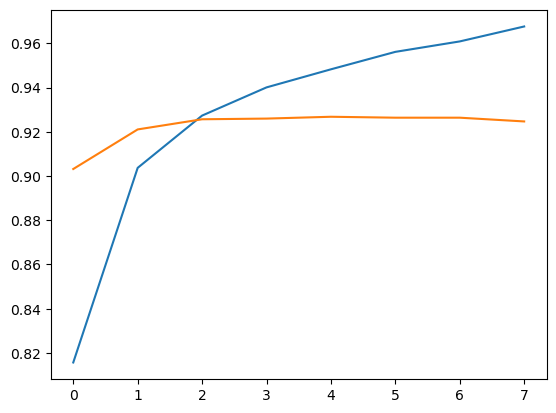

In [20]:
plt.plot(r.history['AUC'])
plt.plot(r.history['val_AUC'])

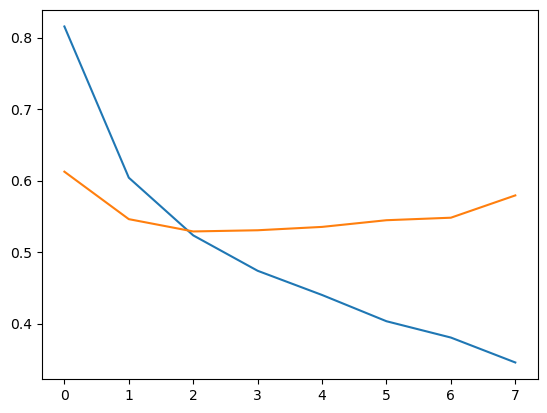

In [21]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

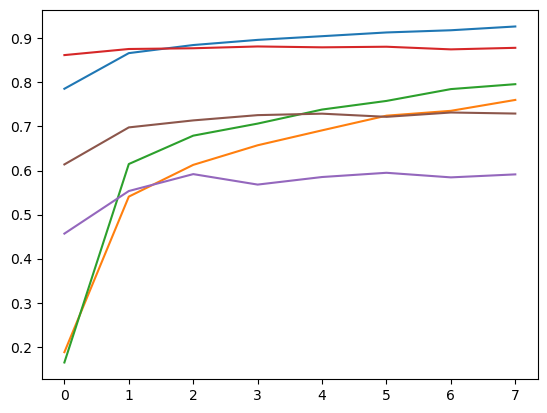

In [22]:
plt.plot(r.history['f1_score'])
plt.plot(r.history['val_f1_score'])

In [40]:
from tensorflow.math import confusion_matrix 

y_pred_one_hot = model.predict(X_test_fit_padded)

# Step 2: Convert one-hot encoded predictions and true labels to class indices
y_pred = np.argmax(y_pred_one_hot, axis=1)
y_true_one_hot = np.array(y_test)  # Ensure y_test is in the correct shape
y_true = np.argmax(y_true_one_hot, axis=1)

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[2530,  215,   69],
       [ 290,  491,  103],
       [ 126,   71,  497]])>

<Axes: >

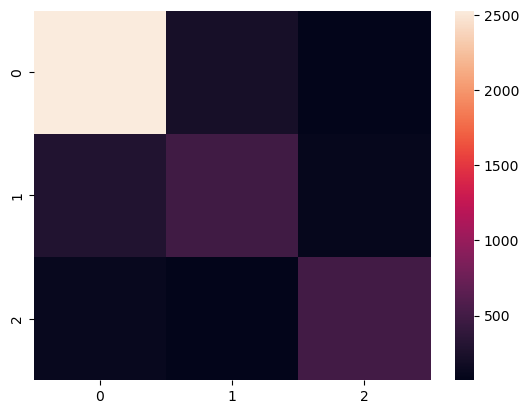

In [43]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='d')

In [30]:
y_test.shape

(4392, 3)

In [28]:
model.predict(X_test_fit_padded).shape

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(4392, 3)